In [1]:
import warnings
warnings.simplefilter('ignore')

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
df = pd.read_csv('Resources/indeed_job_dataset.csv')
df.head()

,Unnamed: 0,Job_Title,Link,Queried_Salary,Job_Type,Skill,Unnamed: 6,No_of_Skills,Company,No_of_Reviews,...,MD,DC,NC,Other_states,Consulting and Business Services,Internet and Software,Banks and Financial Services,Health Care,Insurance,Other_industries
0,0.0,Data Scientist,https://www.indeed.com/rc/clk?jk=6a105f495c36a...,<80000,data_scientist,"SAP, SQL",NaN,2.0,Express Scripts,3301.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1.0,Data Scientist,https://www.indeed.com/rc/clk?jk=86afd561ea8c6...,<80000,data_scientist,"Machine Learning, R, SAS, SQL, Python",NaN,5.0,Money Mart Financial Services,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.0,Data Scientist,https://www.indeed.com/rc/clk?jk=e0aad317e6d45...,<80000,data_scientist,"Data Mining, Data Management, R, SAS, SQL, STA...",NaN,9.0,comScore,62.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3.0,Graduate Studies Program - Data Scientist,https://www.indeed.com/rc/clk?jk=1cfdd9e391a63...,<80000,data_scientist,Certified Internal Auditor,NaN,1.0,Central Intelligence Agency,158.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,4.0,Data Scientist I,https://www.indeed.com/rc/clk?jk=fec647775a21e...,<80000,data_scientist,"Statistical Software, Time Management, R, Micr...",NaN,7.0,Federal Reserve Bank of Dallas,495.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [3]:
data_cleaning = df.replace({'Queried_Salary' : {'<80000': 80000, '80000-99999': 90000, '100000-119999': 110000, '120000-139999': 130000, '140000-159999': 150000, '>160000': 160000}}) 

In [4]:
data_cleaning.drop(['Unnamed: 0', 'Unnamed: 6'], axis=1)

,Job_Title,Link,Queried_Salary,Job_Type,Skill,No_of_Skills,Company,No_of_Reviews,No_of_Stars,Date_Since_Posted,...,MD,DC,NC,Other_states,Consulting and Business Services,Internet and Software,Banks and Financial Services,Health Care,Insurance,Other_industries
0,Data Scientist,https://www.indeed.com/rc/clk?jk=6a105f495c36a...,80000.0,data_scientist,"SAP, SQL",2.0,Express Scripts,3301.0,3.3,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,Data Scientist,https://www.indeed.com/rc/clk?jk=86afd561ea8c6...,80000.0,data_scientist,"Machine Learning, R, SAS, SQL, Python",5.0,Money Mart Financial Services,NaN,NaN,15.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Data Scientist,https://www.indeed.com/rc/clk?jk=e0aad317e6d45...,80000.0,data_scientist,"Data Mining, Data Management, R, SAS, SQL, STA...",9.0,comScore,62.0,3.5,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Graduate Studies Program - Data Scientist,https://www.indeed.com/rc/clk?jk=1cfdd9e391a63...,80000.0,data_scientist,Certified Internal Auditor,1.0,Central Intelligence Agency,158.0,4.3,30.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,Data Scientist I,https://www.indeed.com/rc/clk?jk=fec647775a21e...,80000.0,data_scientist,"Statistical Software, Time Management, R, Micr...",7.0,Federal Reserve Bank of Dallas,495.0,4.1,30.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5,Data Scientist - Entry to Experienced Level,https://www.indeed.com/rc/clk?jk=835a2db493898...,80000.0,data_scientist,"AI, Quantitative Analysis, Data Mining, Machin...",6.0,National Security Agency,173.0,4.3,30.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,Geospatial Data Scientist,https://www.indeed.com/rc/clk?jk=6255c4e94a7ef...,80000.0,data_scientist,"Statistical Software, Machine Learning, R, Ima...",10.0,NYC Careers,30.0,3.8,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7,Data Scientist,https://www.indeed.com/rc/clk?jk=f30ab3f52226b...,80000.0,data_scientist,"Machine Learning, R, SQL",3.0,OM Partners,NaN,NaN,10.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
8,Bioinformatics Data Scientist,https://www.indeed.com/rc/clk?jk=a6e45b6264f26...,80000.0,data_scientist,"Linux, R, C/C++, Python",4.0,University of Idaho,233.0,4.2,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
9,Data Scientist,https://www.indeed.com/rc/clk?jk=56090c965b57d...,80000.0,data_scientist,"JavaScript, Data Mining, TS/SCI Clearance, R, ...",6.0,usajobs.gov,4227.0,4.3,22.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [5]:
data_clean = data_cleaning.dropna(subset=['Queried_Salary', 'No_of_Skills'])

In [6]:
data_clean.Queried_Salary.unique()

array([ 80000.,  90000., 110000., 130000., 150000., 160000.])

In [7]:
data_clean.No_of_Skills.unique()

array([ 2.,  5.,  9.,  1.,  7.,  6., 10.,  3.,  4.,  8., 11., 12.,  0.,
       18., 14., 15., 19., 13., 17., 16., 20.])

In [10]:
y = data_clean["Queried_Salary"].values.reshape(-1,1)
X = data_clean[["No_of_Skills"]]
print(X.shape, y.shape)

(5715, 1) (5715, 1)


In [11]:
model.fit(X, y)
print(model)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [15]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [16]:
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

### END SOLUTION 

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.10750827495475646
Testing Score: 0.07907350870832554


In [17]:
model.rank_

1

Text(0.5, 1.0, 'Residual Plot')

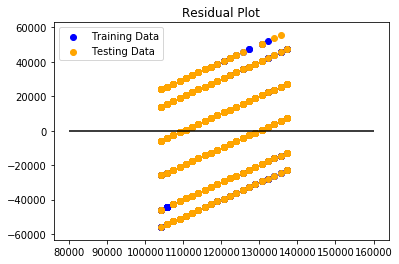

In [18]:
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")

In [ ]:
print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_)

In [ ]:
predictions = model.predict(X)
print(f"True output: {y[0]}")
print(f"Predicted output: {predictions[0]}")
print(f"Prediction Error: {predictions[0]-y[0]}")

In [ ]:
pd.DataFrame({"Predicted": [predictions], "Actual": [y], "Error": [predictions - y]})[["Predicted", "Actual", "Error"]]

In [ ]:
x_min = X.min()
x_max = X.max()

In [ ]:
y_min_actual = y.min()
y_max_actual = y.max()

In [ ]:
y_min = 101.896225057 + 12.44002424 * x_min
y_max = 101.896225057 + 12.44002424 * x_max
print(f"Actual Min Value: {y_min_actual}")
print(f"Calculated Min Value: {y_min}")
print(f"Actual Max Value: {y_max_actual}")
print(f"Calculated Max Value: {y_max}")

In [ ]:
x_min

In [ ]:
y_min

In [ ]:
y_min_predicted = model.predict(np.array(x_min).reshape(-1,1))
y_max_predicted = model.predict(np.array(x_max).reshape(-1,1))
print(f"Actual Min Value: {y_min_actual}")
print(f"Predicted Min Value: {y_min_predicted}")
print(f"Actual Max Value: {y_max_actual}")
print(f"Predicted Max Value: {y_max_predicted}")

In [ ]:
plt.scatter(X, y, c='blue')
plt.plot([x_min, x_max], [y_min, y_max], c='red')

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
class PandasDummies(BaseEstimator, TransformerMixin):
    def transform(self, X, *_):
        return pd.get_dummies(X)
    
    def fit(self, *_):
        return self

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [ ]:
model = make_pipeline(PandasDummies(), StandardScaler(), LinearRegression())
model.fit(X_train, y_train)

In [ ]:
model.steps

In [ ]:
from sklearn.metrics import mean_squared_error

predictions = model.predict(X_test)
MSE = mean_squared_error(y_test, predictions)
r2 = model.score(X_test, y_test)

In [ ]:
print(f"MSE: {MSE}, R2: {r2}")

In [ ]:
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test.min(), xmax=y_test.max())
plt.title("Residual Plot")
plt.show()